In [1]:
import pandas as pd

df = pd.read_csv("data/imputed_dataset.csv")

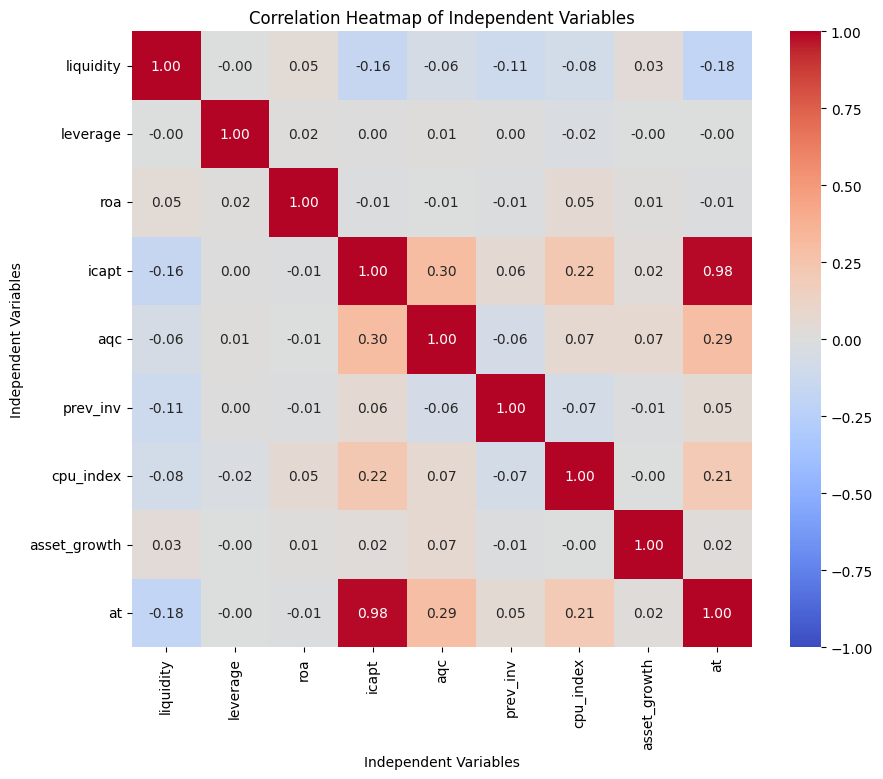

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = df[['liquidity', 'leverage', 'roa', 'icapt', 'aqc', 'prev_inv', 'cpu_index', 'asset_growth', 'at']].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Independent Variables')
plt.xlabel('Independent Variables')
plt.ylabel('Independent Variables')
plt.show()


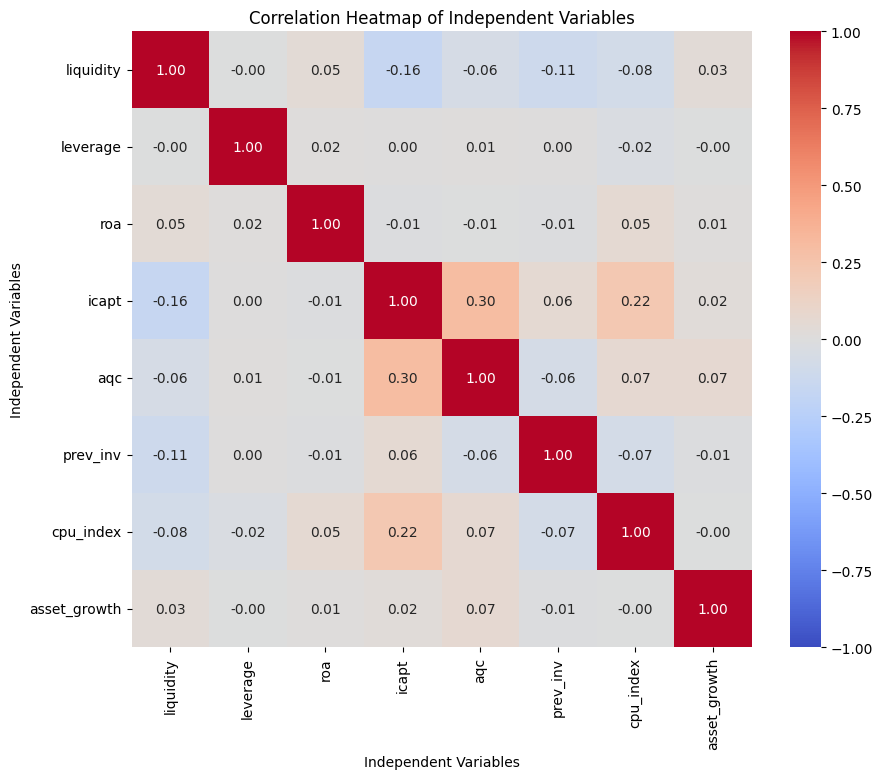

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = df[['liquidity', 'leverage', 'roa', 'icapt', 'aqc', 'prev_inv', 'cpu_index', 'asset_growth']].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Independent Variables')
plt.xlabel('Independent Variables')
plt.ylabel('Independent Variables')
plt.show()


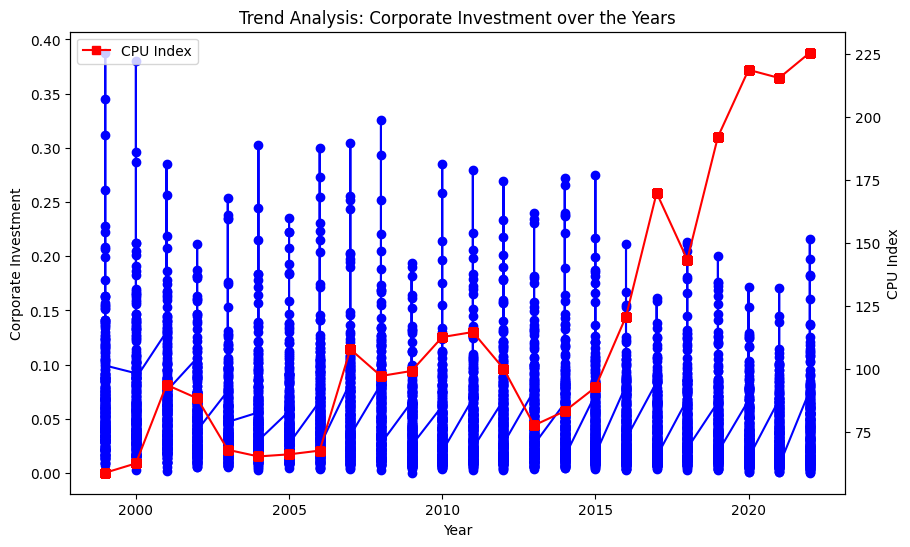

In [7]:
# Plotting the trend analysis
plt.figure(figsize=(10, 6))

# Corporate investment over the years
plt.plot(df['fyear'], df['y'], marker='o', color='blue', label='Corporate Investment')
plt.ylabel('Corporate Investment')
plt.xlabel('Year')
plt.title('Trend Analysis: Corporate Investment over the Years')

# Secondary y-axis for CPU index
plt.twinx()
plt.plot(df['fyear'], df['cpu_index'], marker='s', color='red', label='CPU Index')
plt.ylabel('CPU Index')

# Show legend
plt.legend(loc='upper left')

plt.show()

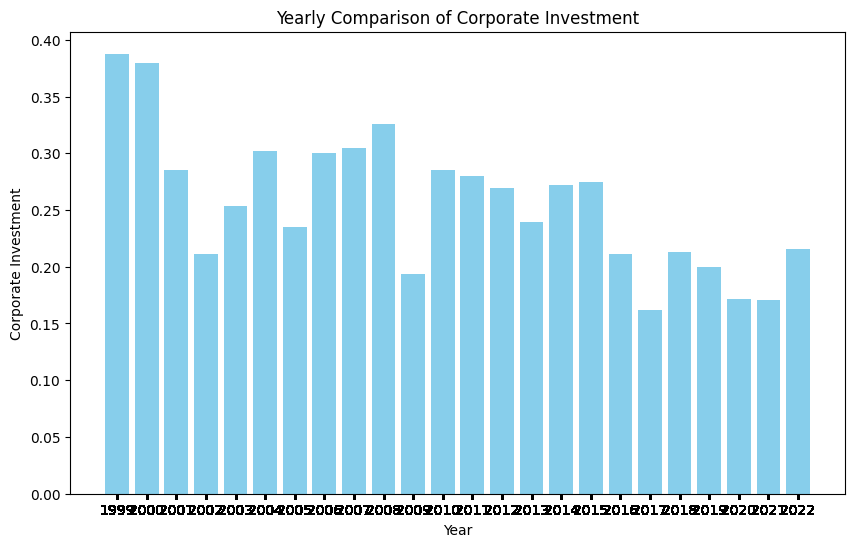

In [9]:
plt.figure(figsize=(10, 6))

plt.bar(df['fyear'], df['y'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Corporate Investment')
plt.title('Yearly Comparison of Corporate Investment')
plt.xticks(df['fyear'])  # Show all years on x-axis

plt.show()

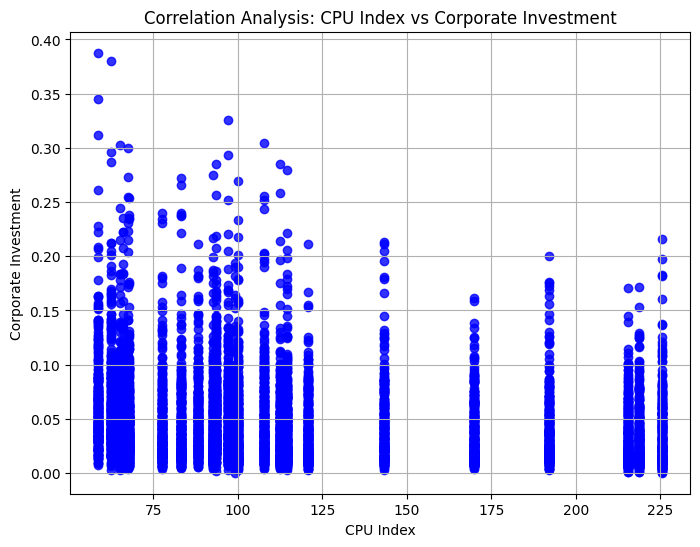

In [11]:
# Scatter plot for correlation analysis
plt.figure(figsize=(8, 6))
plt.scatter(df['cpu_index'], df['y'], color='blue', alpha=0.8)
plt.title('Correlation Analysis: CPU Index vs Corporate Investment')
plt.xlabel('CPU Index')
plt.ylabel('Corporate Investment')
plt.grid(True)
plt.show()

In [13]:
sic_divisions = {
    (100, 1000): "Agriculture, Forestry, and Fishing",
    range(1000, 1500): "Mining",
    range(1500, 1800): "Construction",
    range(2000, 4000): "Manufacturing",
    range(4000, 5000): "Transportation, Communications, Electric, Gas, and Sanitary Services",
    range(5000, 5200): "Wholesale Trade",
    range(5200, 6000): "Retail Trade",
    range(6000, 6800): "Finance, Insurance, and Real Estate",
    range(7000, 9000): "Services",
    range(9100, 9730): "Public Administration",
    range(9900, 10000): "Non-classifiable Establishments"
}

def map_sic_to_division(code):
    for range_, division in sic_divisions.items():
        if isinstance(range_, int):
            if code == range_:
                return division
        elif isinstance(range_, range):
            if code in range_:
                return division
        elif isinstance(range_, tuple):
            if range_[0] <= code <= range_[1]:
                return division
    return None

# Apply the function to create a new column indicating the group
df['division'] = df['sic'].apply(map_sic_to_division)

c:\Users\Ayushee\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


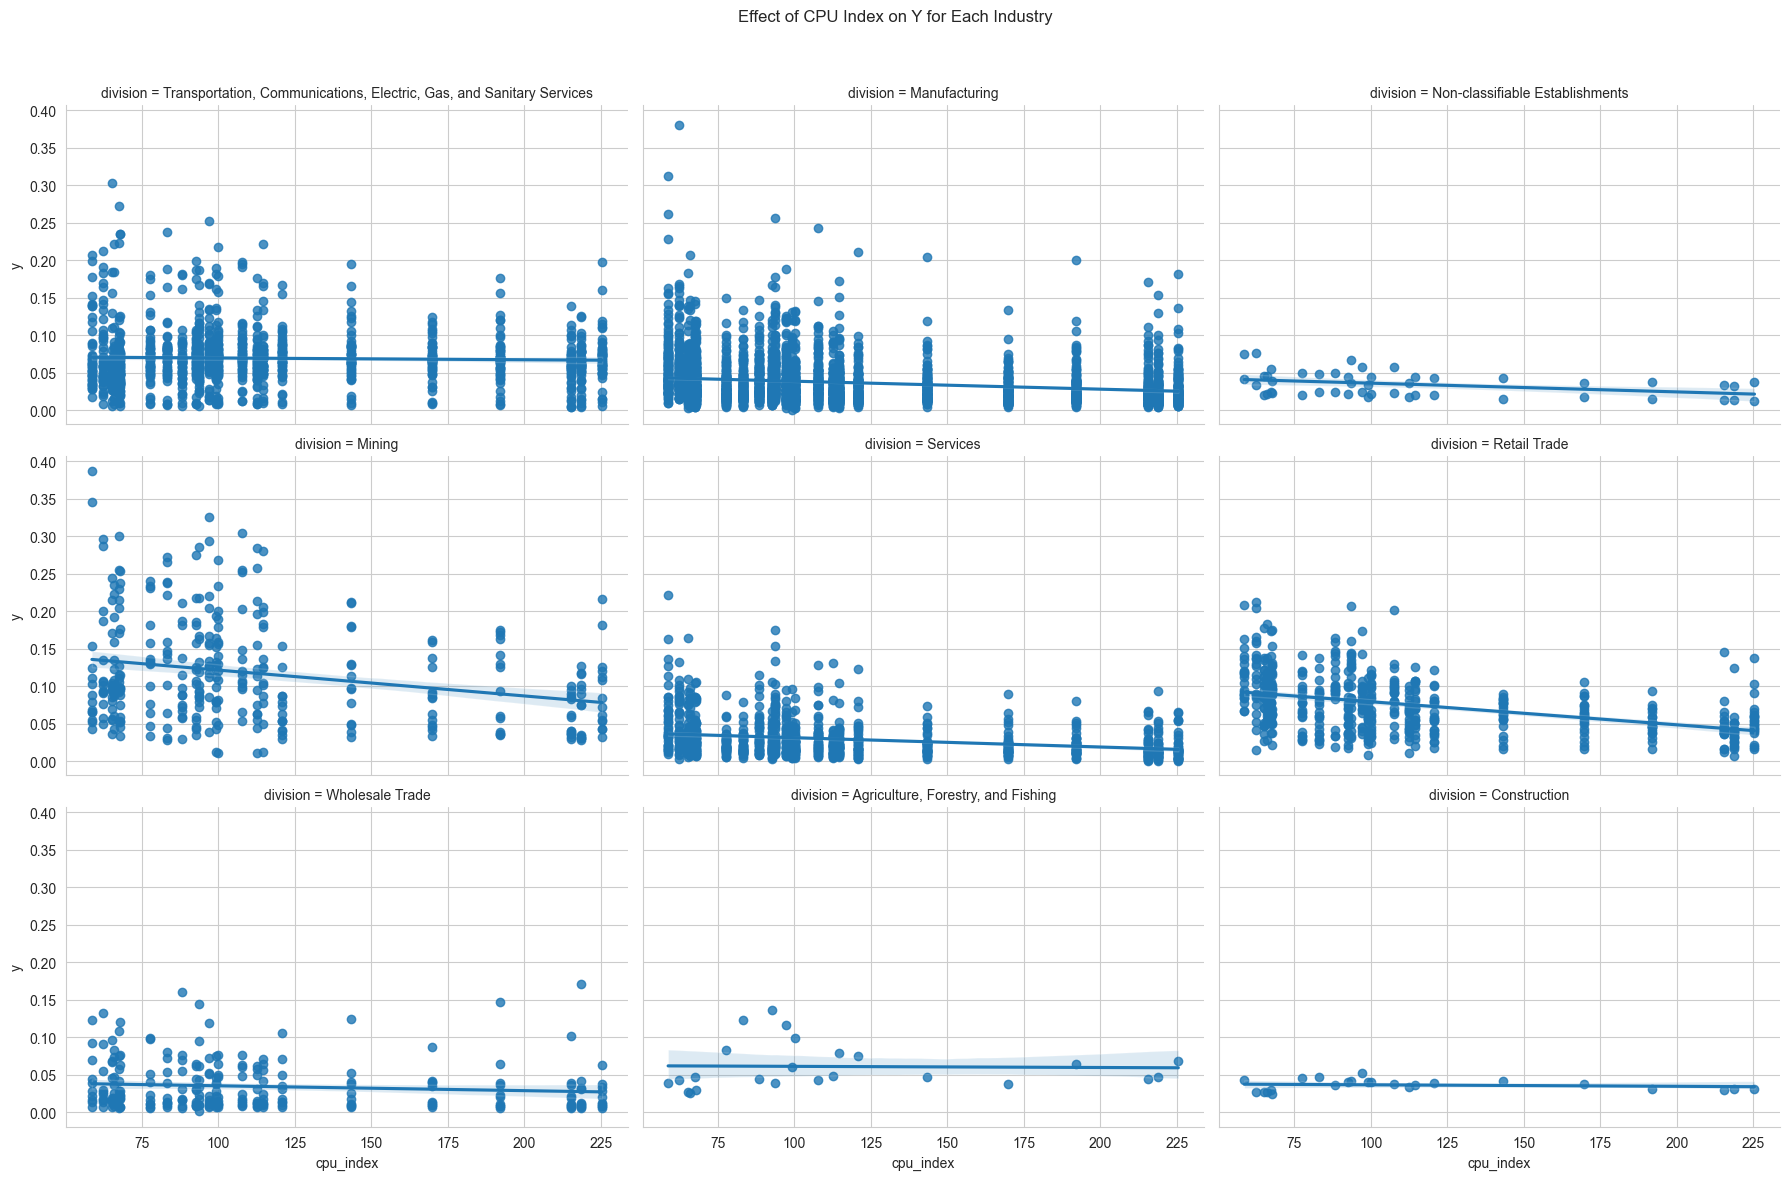

In [14]:
sns.set_style("whitegrid")

# Plot regression lines for each industry
sns.lmplot(x='cpu_index', y='y', col='division', col_wrap=3, data=df, aspect=1.5, height=4)

# Set titles for each plot
plt.subplots_adjust(top=0.9)
plt.suptitle('Effect of CPU Index on Y for Each Industry')

# Show plot
plt.show()

C:\Users\Ayushee\AppData\Local\Temp\ipykernel_18932\2065410848.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='cpu_index', y='y', hue='division', data=df, ci=None)


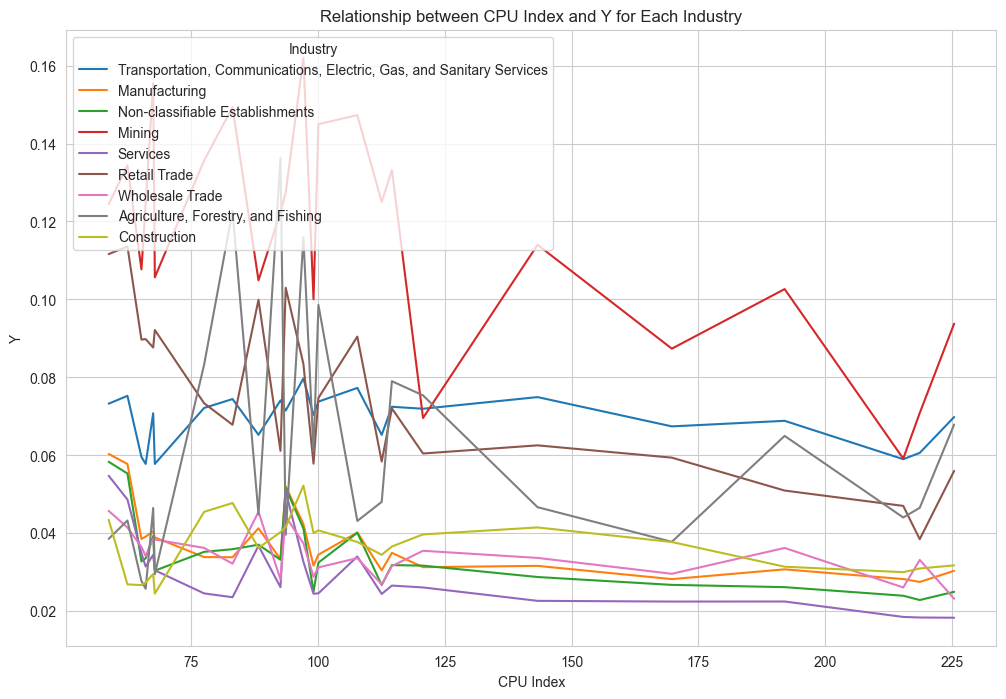

In [15]:
sns.set_style("whitegrid")

# Plot line graph for each industry
plt.figure(figsize=(12, 8))
sns.lineplot(x='cpu_index', y='y', hue='division', data=df, ci=None)

# Set title and labels
plt.title('Relationship between CPU Index and Y for Each Industry')
plt.xlabel('CPU Index')
plt.ylabel('Y')

# Show legend
plt.legend(title='Industry', loc='upper left')

# Show plot
plt.show()